# Estimator/Layers API

In [1]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/media/zheng/study/my_work/project/data/mnist", \
                                 one_hot=False)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /media/zheng/study/my_work/project/data/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /media/zheng/study/my_work/project/data/mnist/train-labels-idx1-ubyte.gz
Extracting /media/zheng/study/my_work/project/data/mnist/t10k-images-idx3-ubyte.gz
Extracting /media/zheng/study/my_work/project/data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# Patameters
learning_rate = 0.1
num_steps = 1000
batch_size = 128
display_step = 200

# Network Parameters
n_hidden_1 = 128 # 第一层神经元数目
n_hidden_2 = 128 # 第二层神经元数目
num_input = 784 # Minist数据输入(img data shape: 28*28)
num_class = 10 # MNIST类别数：0-9

In [3]:
# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images},
    y=mnist.train.labels,
    batch_size=batch_size,
    num_epochs=None,
    shuffle=True)

In [4]:
# Define the neural network
def neural_net(x_dict):
    # TF Estimator input: dict, in case of mul
    x = x_dict['images']
    # Hidden fully connected layer: n_hidden_1 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1)
    layer_1 = tf.Print(layer_1, [tf.shape(layer_1)], message='layer_1 debug:')
    # Hidden fully connected layer: n_hidden_2 neurons
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.layers.dense(layer_2, num_class)
    return out_layer

In [5]:
# Define the model function
# TF Estimator Template
def model_fn(features, labels, mode):
    
    # Build the neural network
    logits = neural_net(features)
    
    #for debug:只会显示在终端
    # logits = tf.Print(logits, [logits],
    #                  message='****Debug for logits shape:')
    
    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, \
                                          predictions=pred_classes)
    
    # Define loss and optimizer
    loss_op = tf.reduce_mean(
        tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32))
    )
    optimizer = tf.train.GradientDescentOptimizer(
        learning_rate=learning_rate)
    train_op = optimizer.minimize(
        loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators输入: EstimatorSpec：
    # 提供不同ops: training, evaluating...
    estim_specs = tf.estimator.EstimatorSpec(
        mode= mode,
        predictions=pred_classes,
        loss=loss_op,
        train_op=train_op,
        eval_metric_ops={'accracy': acc_op})
    return estim_specs

In [6]:
# Build the Estimator
config = tf.estimator.RunConfig(save_summary_steps=display_step)
model = tf.estimator.Estimator(model_fn, model_dir='/media/zheng/study/my_work/project/models/mnist', config=config)

INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_train_distribute': None, '_save_checkpoints_secs': 600, '_model_dir': '/media/zheng/study/my_work/project/models/mnist', '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f562a1aea20>, '_save_summary_steps': 200, '_num_ps_replicas': 0, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_eval_distribute': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_global_id_in_cluster': 0, '_save_checkpoints_steps': None, '_experimental_distribute': None, '_device_fn': None, '_protocol': None, '_task_id': 0, '_log_step_count_steps': 100, '_num_worker_replicas': 1, '_task_type': 'worker', '_is_chief': True, '_tf_random_seed': None}


In [7]:
model.train(input_fn, steps=num_steps)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.print instead of tf.Print. Note that tf.print returns a no-output operator that directly prints the output. Outside of defuns or eager mode, this operator will not be executed unless it is directly specified in session.run or used as a control dependency for other operators. This is only a concern in graph mode. Below is an example of how to ensure tf.print executes in graph mode:
```python
    sess = tf.Session()
    with sess.as_default():
        tensor = tf.range(10)
        print_op = tf.print(tensor)
        with tf.control_dependencies([print_op]):
          out = tf.add(tensor, tensor)
        sess.run(out)
    ```
Additionally, to use tf.print in python 2.7, users must make sure to import
the following:

  `from __future__ import print_function`



In [75]:
# Evaluate the model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(x={
    'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator evaluate mode
model.evaluate(input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-19-09:37:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpx739b0pv/model.ckpt-79
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-19-09:37:27
INFO:tensorflow:Saving dict for global step 79: accracy = 0.879, global_step = 79, loss = 0.42198962
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 79: /tmp/tmpx739b0pv/model.ckpt-79


{'accracy': 0.879, 'global_step': 79, 'loss': 0.42198962}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpx739b0pv/model.ckpt-79
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


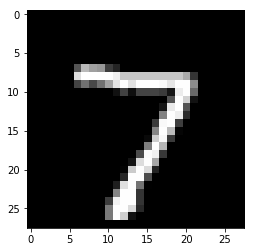

Model prediction: 7


In [79]:
# Predict single images
n_images = 1
test_images = mnist.test.images[:n_images]
# Prepare the input images
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)

# use the model to predict
preds = list(model.predict(input_fn))

# Display
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])